In [58]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how='inner', on='city')

# Display the data table for preview
city_ride_data['type'].value_counts()
city_ride_data.to_csv("output.csv")
print(city_ride_data.head())

                 city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  Lake Jonathanshire  2018-04-07 20:51:11  31.25  4441251834598   
2  Lake Jonathanshire  2018-03-09 23:45:55  19.89  2389495660448   
3  Lake Jonathanshire  2018-04-07 18:09:21  24.28  7796805191168   
4  Lake Jonathanshire  2018-01-02 14:14:50  13.89   424254840012   

   driver_count   type  
0             5  Urban  
1             5  Urban  
2             5  Urban  
3             5  Urban  
4             5  Urban  


## Bubble Plot of Ride Sharing Data

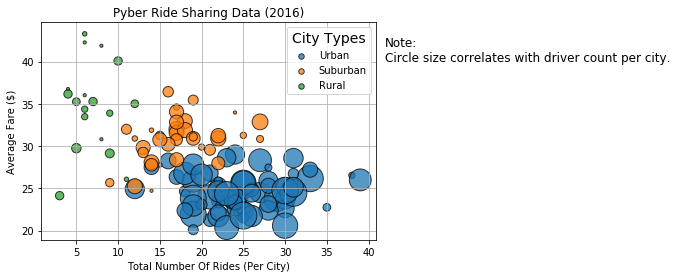

In [59]:
import matplotlib.cm as cm
import matplotlib.colors as col
city_type = city_ride_data['type'].unique()
handle_list = []
cnt = 0

# Loop through all the city types
for i in city_type:
    type_df = city_ride_data.loc[city_ride_data['type']== i, ['city', 'ride_id', 'fare', 'driver_count']]
    total_rides = type_df.groupby(['city'])['ride_id'].count()
    avg_fare = type_df.groupby(['city'])['fare'].mean()
    sizes = type_df.groupby(['city'])['driver_count'].first()*10
    # Build the scatter plots for each city types
    handle = plt.scatter(total_rides, avg_fare, marker="o", color = 'C'+str(cnt),
                         edgecolors="black", s=sizes, alpha=0.75, label=i)
    handle_list.append(handle)
    cnt += 1

# Create a legend
lg = plt.legend(handles=handle_list, loc='best', title='City Types', fancybox=True,shadow=False)
lg.get_title().set_fontsize('14')

for i,_ in enumerate(handle_list):
    lg.legendHandles[i]._sizes = [30]
   

# Add labels to the x and y axes
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number Of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate the other graph properties
plt.grid()

# Incorporate a text label regarding circle size
plt.text(42, 40, 'Note:\nCircle size correlates with driver count per city.', fontsize=12)

# Save Figure
plt.savefig("../Images/RideSharingBubblePlot.png")
plt.show()


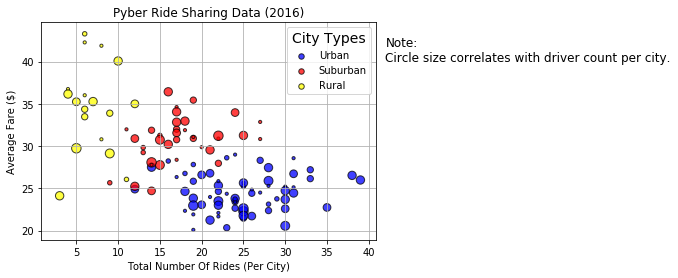

In [60]:
# Obtain the x and y coordinates for each of the three city types


urban_df = city_ride_data.loc[city_ride_data['type']=='Urban',['city', 'ride_id', 'fare', 'driver_count']]
urban_df.head()
u_total_rides = urban_df.groupby(['city'])['ride_id'].count()
u_total_rides
u_avg_fare = urban_df.groupby(['city'])['fare'].mean()
u_avg_fare.head()
sizes = urban_df.groupby(['city'])['driver_count'].first()*10

suburban_df = city_ride_data.loc[city_ride_data['type']=='Suburban',['city', 'ride_id', 'fare', 'driver_count']]
su_total_rides = suburban_df.groupby(['city'])['ride_id'].count()
su_total_rides
su_avg_fare = suburban_df.groupby(['city'])['fare'].mean()
su_avg_fare.head()
sizes = suburban_df.groupby(['city'])['driver_count'].first()*10

rural_df = city_ride_data.loc[city_ride_data['type']=='Rural',['city', 'ride_id', 'fare', 'driver_count']]
rural_df.head()
rural_total_rides = rural_df.groupby(['city'])['ride_id'].count()
rural_total_rides
rural_avg_fare = rural_df.groupby(['city'])['fare'].mean()
rural_avg_fare.head()
sizes = rural_df.groupby(['city'])['driver_count'].first()*10

# Build the scatter plots for each city types
u = plt.scatter(u_total_rides, u_avg_fare, marker="o", facecolors="blue", edgecolors="black", s=sizes, alpha=0.75, label='Urban')
su = plt.scatter(su_total_rides, su_avg_fare, marker="o", facecolors="red", edgecolors="black", s=sizes, alpha=0.75, label='Suburban')
r = plt.scatter(rural_total_rides, rural_avg_fare, marker="o", facecolors="yellow", edgecolors="black", s=sizes, alpha=0.75, label='Rural')

# Add labels to the x and y axes
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number Of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate the other graph properties
plt.grid()

# Create a legend
lg = plt.legend(handles=[u, su, r], loc='best', title='City Types', fancybox=True,shadow=False)
lg.get_title().set_fontsize('14')
lg.legendHandles[0]._sizes = [30]
lg.legendHandles[1]._sizes = [30]
lg.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 40, 'Note:\nCircle size correlates with driver count per city.', fontsize=12)

# Save Figure
plt.savefig("../Images/RideSharingBubblePlot.png")
plt.show()


## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()